In [153]:
import numpy as np, pandas as pd
import seaborn as sns
import glob

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
rpath_list = sorted(glob.glob("dump/qpsp_bcmD0_PCA/*.tsv"))

In [5]:
# Subtype labels
LABEL_RPATH = "data/GSE67684/processed/metadata_combined-label_subtype_edited.tsv"
subtype_labels = pd.read_csv(LABEL_RPATH, sep="\t")

In [557]:
# FEATURES_RPATH = "dump/features-qpsp.tsv"
FEATURES_RPATH = "dump/features-quantile.tsv"
# FEATURES_RPATH = "dump/features-cs_quantile.tsv"

data = pd.read_csv(FEATURES_RPATH, sep="\t")
# Feature selection
X = data.iloc[:,np.r_[0,8,10]]
# OPTION 2
# X = data.iloc[:,np.r_[0,8:11]]
list(X)

['erm1', 'l2norm_d0_d8', 'angle_d0_d8']

In [558]:
### DECISION TREE ###
# for i in range(len(rpath_list)):
#     i = 0
#     print(rpath_list[i])
#     data = pd.read_csv(rpath_list[i], sep="\t")

data = pd.read_csv(FEATURES_RPATH, sep="\t")
# Feature selection
X = data.iloc[:,np.r_[0,8:11]]
print(list(X))
print("X.shape =", X.shape)
# Create labels
y = data.iloc[:,15]

# Create and train model
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
clf = clf.fit(X, y)
# Results of training set
print(clf.score(X,y))

# Decision rules
tree_rules = tree.export_text(clf, feature_names=list(X))
print(tree_rules)

['erm1', 'l2norm_d0_d8', 'diff_l2norm', 'angle_d0_d8']
X.shape = (201, 4)
0.8109452736318408
|--- erm1 <= 77.85
|   |--- l2norm_d0_d8 <= 60.60
|   |   |--- l2norm_d0_d8 <= 59.20
|   |   |   |--- class: 1
|   |   |--- l2norm_d0_d8 >  59.20
|   |   |   |--- class: 1
|   |--- l2norm_d0_d8 >  60.60
|   |   |--- angle_d0_d8 <= 85.62
|   |   |   |--- class: 0
|   |   |--- angle_d0_d8 >  85.62
|   |   |   |--- class: 1
|--- erm1 >  77.85
|   |--- diff_l2norm <= -3.74
|   |   |--- angle_d0_d8 <= 78.15
|   |   |   |--- class: 0
|   |   |--- angle_d0_d8 >  78.15
|   |   |   |--- class: 0
|   |--- diff_l2norm >  -3.74
|   |   |--- diff_l2norm <= -2.20
|   |   |   |--- class: 1
|   |   |--- diff_l2norm >  -2.20
|   |   |   |--- class: 0



In [567]:
subtype = subtype_labels.loc[X.index.values, "subtype"]
# Concatenate subtype and truth labels
X1 = pd.concat([X, subtype, y],1).sort_values(["erm1","l2norm_d0_d8"])
list_dfs = list(X1.groupby("subtype"))
X5 = list_dfs[7][1]
print(list_dfs[7][0])
X2 = X5[X5["erm1"] < 74]
# X3 = X2[X2["l2norm_d0_d8"] > 0.54]
# X4 = X3[X3["angle_d0_d8"] > 49]
# X2.sort_values("l2norm_d0_d8")
# X1[X1["label"] == 1]

X2.sort_values("l2norm_d0_d8")

TEL-AML1


,erm1,l2norm_d0_d8,diff_l2norm,angle_d0_d8,subtype,label
P094,2.546237,39.866823,4.005523,16.077350,TEL-AML1,1
P034,28.164852,46.082799,-12.405065,26.780112,TEL-AML1,1
P018,9.572125,58.586322,-13.280254,27.182508,TEL-AML1,0
P019,-4.868939,60.042791,5.435206,24.044038,TEL-AML1,1
P016,29.906687,68.533350,-24.788279,34.994917,TEL-AML1,0
P026,10.316319,70.010373,-19.702168,47.391586,TEL-AML1,0
P032,-15.270073,71.829681,-12.541169,43.256935,TEL-AML1,0
P022,31.300584,80.924355,-25.461216,45.167820,TEL-AML1,0
P028,44.448422,83.139407,-36.988862,36.333975,TEL-AML1,0
P029,59.910748,109.514502,-41.295572,58.021017,TEL-AML1,1


In [295]:
# Construct decision tree
X2 = X1[X1["erm1"] < 0.8]
X3 = X2[X2["l2norm_d0_d8"] < 1.96]
X4 = X3[X3["angle_d0_d8"] > 49]
X4

# Random stratified split
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     random_state=1,
#                                                     test_size=0.2)

<IPython.core.display.Javascript object>


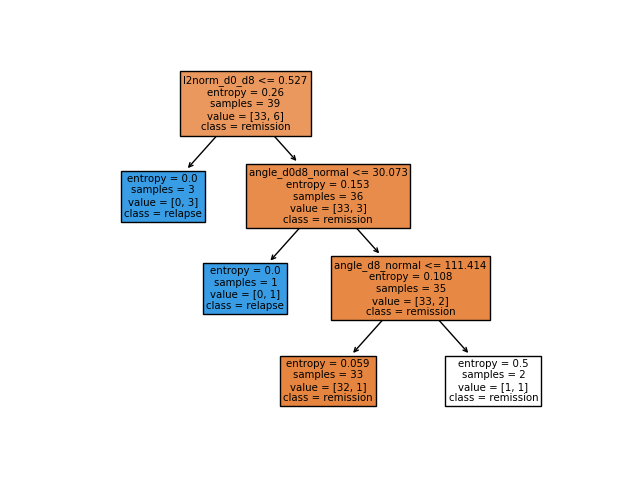

In [292]:
%matplotlib notebook
# Visualise rules of decision tree
decision_plot = tree.plot_tree(clf, feature_names=list(X),
               class_names=("remission", "relapse"), filled=True)

In [467]:
i = 4
print(rpath_list[i])
data = pd.read_csv(rpath_list[i], sep="\t")

# Feature selection
X = data.iloc[:,np.r_[0,8:11]]
print("X.shape =", X.shape)
print(list(X))
# Create labels
y = data.iloc[:,15]

# X1 = pd.concat([X,y],1).sort_values(["erm1","l2norm_d0_d8"])
X1 = pd.concat([X,y],1).sort_values(["erm1"])
X1

dump/features-T-ALL.tsv
X.shape = (13, 4)
['erm1', 'l2norm_d0_d8', 'diff_l2norm', 'angle_d0_d8']


,erm1,l2norm_d0_d8,diff_l2norm,angle_d0_d8,label
P009,-1.808448,1.963771,0.627090,139.381762,0
P116,-0.318512,0.604693,-0.205446,28.776312,0
P190,0.254869,0.804807,0.108009,69.330651,0
P103,0.496922,0.863875,0.105613,75.533635,0
P012,0.577945,1.591515,-0.183520,65.036202,0
P007,0.759106,0.963241,-0.201693,48.446723,1
P151,0.785400,1.918365,0.910937,114.030765,1
P010,0.836019,1.540514,0.291626,101.718595,0
P008,1.135113,1.955831,-0.468597,131.910418,0
P001,1.409616,1.955201,-0.045467,130.129004,0


In [473]:
# Construct decision tree
X2 = X1[X1["erm1"] < 0.8]
X3 = X2[X2["l2norm_d0_d8"] < 1.96]
X4 = X3[X3["angle_d0_d8"] > 49]
X4

,erm1,l2norm_d0_d8,diff_l2norm,angle_d0_d8,label
P190,0.254869,0.804807,0.108009,69.330651,0
P103,0.496922,0.863875,0.105613,75.533635,0
P012,0.577945,1.591515,-0.183520,65.036202,0
P151,0.785400,1.918365,0.910937,114.030765,1


In [430]:
y_predict = data["d33_mrd"] > 0.0001
y_predict = y_predict.astype(int)

sum(y_predict != y)
pd.concat([y_predict, data.iloc[:,14:16]], 1)

,d33_mrd,d33_mrd,label
P001,1,0.0005,0
P004,1,0.0800,0
P005,0,0.0001,0
P007,1,0.0040,1
P008,0,0.0001,0
P009,0,0.0000,0
P010,0,0.0001,0
P011,0,0.0000,0
P012,1,0.0005,0
P103,1,0.0300,0


In [124]:
### NAIVE BAYES ###

# Import data
FEATURES_RPATH = rpath_list[5]
print(FEATURES_RPATH)
data = pd.read_csv(FEATURES_RPATH, sep="\t")
print(data.shape)

# Feature selection
X1 = data.iloc[:,np.r_[0,8,10]]
print("X1:", list(X1))

# OPTION 2
X2 = data.iloc[:,np.r_[0,8,6]]
print("X2:", list(X2))

y = data.iloc[:,15]

dump/qpsp_bcmD0_PCA/features-TEL-AML1.tsv
(39, 16)
X1: ['erm1', 'l2norm_d0_d8', 'angle_d0_d8']
X2: ['erm1', 'l2norm_d0_d8', 'd0_normal_proj']


In [125]:
gnb_clf = GaussianNB()

# Fit to X1
gnb_clf.fit(X1, y)
# Fitted parameters for each class
class_var = gnb_clf.sigma_
class_mean = gnb_clf.theta_
print("X1")
print(class_mean)
print(class_var)
print(gnb_clf.score(X1, y))

# Fit to X2
gnb_clf.fit(X2, y)
# Fitted parameters for each class
class_var = gnb_clf.sigma_
class_mean = gnb_clf.theta_
print("X2")
print(class_mean)
print(class_var)
print(gnb_clf.score(X2, y))

X1
[[ 0.85678992  1.63293024 87.96206094]
 [ 0.29635265  0.90428886 52.7139432 ]]
[[5.24740238e-01 4.85057986e-01 1.03345327e+03]
 [6.94208677e-02 5.56250475e-01 1.35681662e+03]]
0.7692307692307693
X2
[[0.85678992 1.63293024 2.16713754]
 [0.29635265 0.90428886 2.28838855]]
[[0.52473899 0.48505674 0.22985608]
 [0.06941962 0.55624923 0.01509742]]
0.8461538461538461


In [152]:
data1 = pd.concat([data.iloc[:,[0,8,10,6]], y], 1)
data1_long = data1.melt(id_vars=["label"], var_name="feature")


,label,feature,value
0,0,erm1,0.887129
1,0,erm1,0.445209
2,0,erm1,1.399341
3,0,erm1,0.263330
4,0,erm1,1.851207
5,0,erm1,-0.137336
6,1,erm1,0.052515
7,0,erm1,0.416832
8,0,erm1,0.479839
9,0,erm1,-1.370682
